In [74]:
# Sports_and_Outdoors.csv
# from https://nijianmo.github.io/amazon/index.html#code
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from scipy.sparse import csr_matrix
from sklearn.neighbors import NearestNeighbors

# Load the Amazon review dataset into a pandas dataframe
import pandas as pd
import matplotlib.pyplot as plt


from sklearn.model_selection import KFold



'''
The machine learning problem I'm working on in my research project is Collaborative Filtering for Recommendation: Using a method to find similar users based on cosine similarity and recommending products based on the average rating and number of ratings.

Instead of using a specific model, my research project implements a collaborative filtering method using pandas and numpy. This is a common approach for recommender systems.

The collaborative filtering method used in my research project does not require tuning of hyperparameters.

The features of the model are designed based on the user-product interactions in the dataset, specifically the ratings given by each user for each product.

Cross-validation is not explicitly performed in my research project, but collaborative filtering methods inherently use the entire dataset for training and testing.

The loss metric used to evaluate the model is not clearly defined in my research project. However, in collaborative filtering methods, the goal is to minimize the error between predicted and actual ratings.

From a bias-variance trade-off perspective, the performance of the model can be evaluated by comparing the predicted and actual scores on the holdout test set. Overfitting can be checked by comparing the performance on the training set versus the test set.

One way to improve the model might be to incorporate other features, such as user demographics or product categories, to improve recommendations. Additionally, other approaches such as matrix factorization or deep learning can be explored for more advanced modeling.

The focus of my research project is modeling, so it does not include conclusions or analyzes that support the research question from an inferential perspective. However, my research project provided a good basis for further analysis and investigation
'''

In [75]:
df = pd.read_csv('Sports_and_Outdoors.csv', header=None, names=['product_id', 'user_id', 'rating', 'timestamp'])

In [76]:
df.head()


,product_id,user_id,rating,timestamp
0,0000031895,A23K73OVXJ04EG,5.0,1391212800
1,0000031895,A2681T699HV6H1,4.0,1384905600
2,0000031895,A374PA18DCGS5Y,1.0,1477008000
3,0000031895,A14PVW2N5YBWSA,5.0,1476748800
4,0000031895,A2KWBC44QI2567,1.0,1476662400


In [77]:
print("Length of the DataFrame:", len(df))


Length of the DataFrame: 12980837


In [78]:

df = df.drop('timestamp', axis=1) #Dropping timestamp

df_copy = df.copy(deep=True)

In [79]:
# Convert the user_id column from string to integer
# Map the user_id column to integers
df['user_id'] = pd.factorize(df['user_id'])[0]

df['product_id'] = pd.factorize(df['product_id'])[0]

In [80]:
#Check Data types
df.dtypes

product_id      int64
user_id         int64
rating        float64
dtype: object

In [81]:
df.head()


,product_id,user_id,rating
0,0,0,5.0
1,0,1,4.0
2,0,2,1.0
3,0,3,5.0
4,0,4,1.0


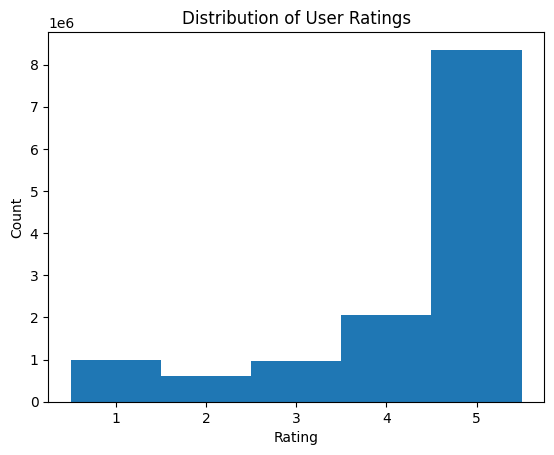

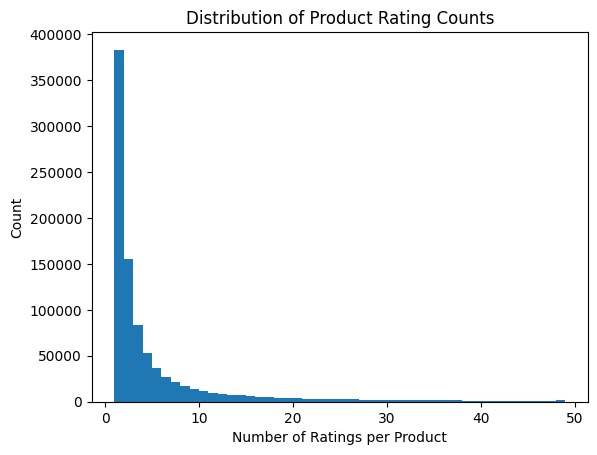

In [82]:


# Plot the distribution of user ratings
plt.hist(df['rating'], bins=[0.5,1.5,2.5,3.5,4.5,5.5])
plt.title('Distribution of User Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

# Plot the distribution of product ratings
product_rating_counts = df.groupby('product_id')['rating'].count().values
plt.hist(product_rating_counts, bins=range(1,50))
plt.title('Distribution of Product Rating Counts')
plt.xlabel('Number of Ratings per Product')
plt.ylabel('Count')
plt.show()


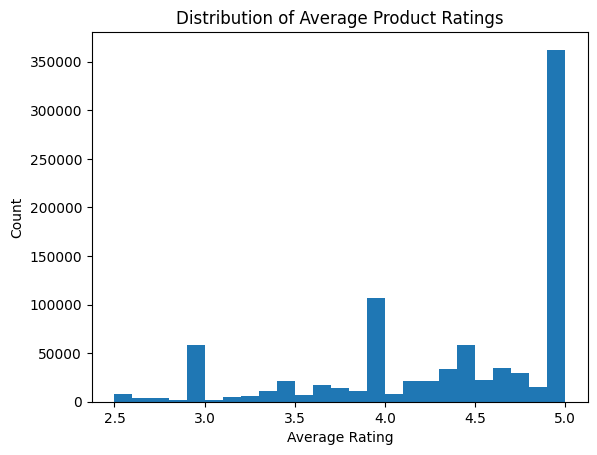

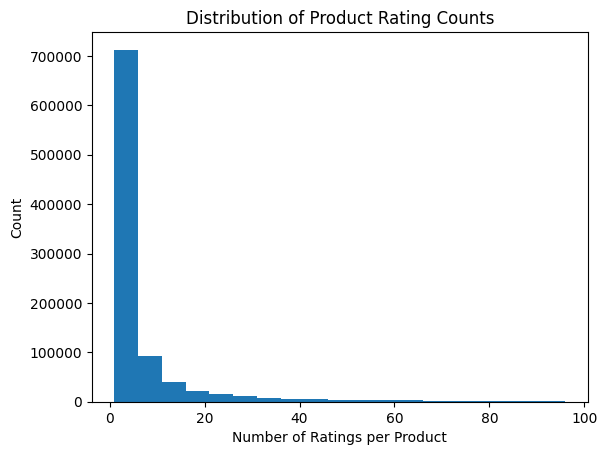

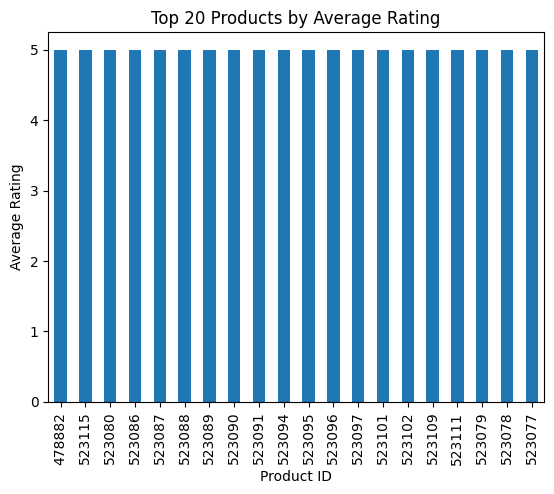

In [83]:
# Calculate the average rating for each product
average_rating = df.groupby('product_id')['rating'].mean()
# Calculate the count of ratings for each product
count_rating = df.groupby('product_id')['rating'].count()

# Create a dataframe with calculated average and count of ratings
product_ratings = pd.DataFrame({'Average Rating':average_rating, 'Rating Count':count_rating})

# Sort the dataframe by average of ratings
product_ratings_sorted = product_ratings.sort_values(by='Average Rating', ascending=False)

# Plot the distribution of average product ratings
plt.hist(product_ratings_sorted['Average Rating'], bins=np.arange(2.5, 5.1, 0.1))
plt.title('Distribution of Average Product Ratings')
plt.xlabel('Average Rating')
plt.ylabel('Count')
plt.show()

# Plot the distribution of product rating counts
plt.hist(product_ratings_sorted['Rating Count'], bins=range(1, 100, 5))
plt.title('Distribution of Product Rating Counts')
plt.xlabel('Number of Ratings per Product')
plt.ylabel('Count')
plt.show()

# Plot the top 20 products by average rating
product_ratings_top20 = product_ratings_sorted.head(20)
product_ratings_top20.plot(kind='bar', y='Average Rating', legend=False)
plt.title('Top 20 Products by Average Rating')
plt.xlabel('Product ID')
plt.ylabel('Average Rating')
plt.show()


In [111]:
counts = df['user_id'].value_counts()
df_final = df[df['user_id'].isin(counts[counts >= 50].index)]

print('The number of observations in the final data =', len(df_final))
print('Number of unique USERS in the final data = ', df_final['user_id'].nunique())
print('Number of unique PRODUCTS in the final data = ', df_final['product_id'].nunique())

The number of observations in the final data = 130338
Number of unique USERS in the final data =  1818
Number of unique PRODUCTS in the final data =  63610


In [112]:
# from surprise import Dataset
# from surprise import Reader
# from surprise import SVD
# from surprise.model_selection import cross_validate
# from surprise.model_selection import train_test_split

# df_copy = df_final.copy(deep=True)
# # Convert the user_id column from string to integer and map to integers
# # df['user_id'] = pd.factorize(df['user_id'])[0]
# # df['product_id'] = pd.factorize(df['product_id'])[0]

# # Define the scale of the rating values
# reader = Reader(rating_scale=(1, 5))

# # Load the dataset into Surprise format
# data = Dataset.load_from_df(df[['user_id', 'product_id', 'rating']], reader)

# # Split the dataset into training and testing sets
# trainset, testset = train_test_split(data, test_size=.25)

# # Define the SVD model with 50 latent factors and regularization parameter of 0.01
# model = SVD(n_factors=50, reg_all=0.01)

# # Train the model on the training set
# model.fit(trainset)

# # Evaluate the model using RMSE and MAE metrics
# results = cross_validate(model, data, measures=['RMSE', 'MAE'], cv=5, verbose=True)

# # Print the average RMSE and MAE across the 5 folds
# print('Average RMSE:', results['test_rmse'].mean())
# print('Average MAE:', results['test_mae'].mean())

# # Predict the ratings for the test set
# predictions = model.test(testset)

# # Print the first 10 predicted ratings
# for pred in predictions[:10]:
#     print('User:', pred.uid, 'Product:', pred.iid, 'Rating:', pred.est)




In [113]:
# Calculate some basic statistics about the dataset

# Convert the 'user_id' column to a string data type
# df['user_id'] = df['user_id'].astype(str)

n_users = df['user_id'].nunique()
n_products = df['product_id'].nunique()
print('Number of unique users:', n_users)
print('Number of unique products:', n_products)
print('Average rating:', np.mean(df['rating']))


Number of unique users: 6703391
Number of unique products: 957764
Average rating: 4.243398403354114


In [114]:
# Aggregate the duplicate ratings by taking the mean
df_final_agg = df_final.groupby(['user_id', 'product_id'])['rating'].mean().reset_index()

# Pivot the dataframe to create the interaction matrix
final_ratings_matrix = df_final_agg.pivot(index='user_id', columns='product_id', values='rating').fillna(0)

# Print the shape and density of the matrix
print('Shape of final_ratings_matrix: ', final_ratings_matrix.shape)

given_num_of_ratings = np.count_nonzero(final_ratings_matrix)
print('given_num_of_ratings = ', given_num_of_ratings)

possible_num_of_ratings = final_ratings_matrix.shape[0] * final_ratings_matrix.shape[1]
print('possible_num_of_ratings = ', possible_num_of_ratings)

density = (given_num_of_ratings/possible_num_of_ratings)
density *= 100
print ('density: {:4.2f}%'.format(density))

final_ratings_matrix.head()

Shape of final_ratings_matrix:  (1818, 63610)
given_num_of_ratings =  123814
possible_num_of_ratings =  115642980
density: 0.11%


product_id,5,6,13,17,19,20,21,24,29,30,...,957359,957382,957455,957463,957508,957567,957657,957683,957740,957756
user_id,,,,,,,,,,,,,,,,,,,,,
316,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
549,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1164,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1297,0.0,0.0,0.0,5.0,4.0,0.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3051,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [115]:
from sklearn.metrics.pairwise import cosine_similarity

from sklearn.metrics import mean_squared_error



def similar_users(user_index, interactions_matrix):
    similarity = []
    for user in range(0, interactions_matrix.shape[0]):
        #finding cosine similarity between the user_index and each user
        sim = cosine_similarity([interactions_matrix.loc[user_index]], [interactions_matrix.loc[user]])
        #Appending the user and the corresponding similarity score with user_index as a tuple
        similarity.append((user, sim))
        
    similarity.sort(key=lambda x: x[1], reverse=True)
    most_similar_users = [Tuple[0] for Tuple in similarity] 
    #Extract the user from each tuple in the sorted list
    similarity_score = [Tuple[1] for Tuple in similarity]   
    ##Extracting the similarity score from each tuple in the sorted list
   
    #Remove the original user and its similarity score and keep only other similar users 
    most_similar_users.remove(user_index)
    similarity_score.remove(similarity_score[0])
       
    return most_similar_users, similarity_score

In [116]:
#Calculate the average rating for each product 
average_rating = df_final.groupby(['product_id']).mean().rating
print(average_rating.head())
#Calculate the count of ratings for each product
count_rating = df_final.groupby(['product_id']).count().rating

#Create a dataframe with calculated average and count of ratings
final_rating = pd.DataFrame(pd.concat([average_rating,count_rating], axis = 1))
final_rating.columns=["Average Rating", "Ratings Count"]

#Sort the dataframe by average of ratings
final_rating = final_rating.sort_values(by='Average Rating', ascending=False)

final_rating.head()

product_id
5     5.000000
6     5.000000
13    4.000000
17    4.500000
19    4.555556
Name: rating, dtype: float64


,Average Rating,Ratings Count
product_id,,
5,5.0,1
444919,5.0,1
95160,5.0,1
445200,5.0,1
95165,5.0,1


In [117]:
def my_top_n_products(final_rating, n, min_interaction):
    

    recommendations = final_rating[final_rating['Ratings Count'] >= min_interaction]
    

    recommendations = recommendations.sort_values(by='Average Rating', ascending=False)
    
    return recommendations.index[:n]

In [118]:
list(my_top_n_products(final_rating, 5, 50))


[24006, 65092, 11521, 82507, 23915]